# 1. Undercomplete Autoencoder

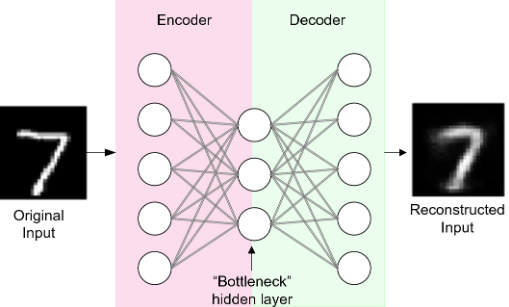

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
under_encoder = tf.keras.models.Sequential([tf.keras.layers.Dense(123, input_shape=[784])])
under_decoder = tf.keras.models.Sequential([tf.keras.layers.Dense(784, input_shape=[123])])
under_autoencoder = tf.keras.models.Sequential([under_encoder, under_decoder])

under_autoencoder.compile(loss="mse", optimizer='sgd')

In [ ]:
history = under_autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0433
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0425
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0417
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409


In [ ]:
coding = under_encoder.predict(X_train)

In [ ]:
coding.shape

(60000, 123)

In [ ]:
reconstruction = under_autoencoder.predict(X_test[:1,:])

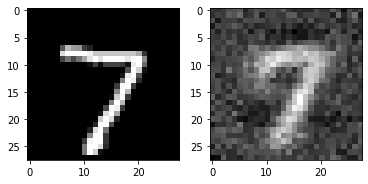

In [ ]:
plt.subplot(121)
plt.imshow(X_test[:1,:].reshape(28,28),cmap='gray')
plt.subplot(122)
plt.imshow(reconstruction.reshape(28,28),cmap='gray')

# 2. Stack Autoencoder

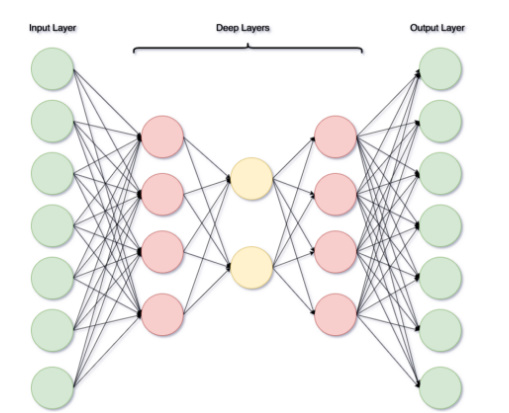

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
stack_encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(120, activation="relu",input_shape=[784]),
    tf.keras.layers.Dense(40, activation="relu"),
])
stack_decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[40]),
    tf.keras.layers.Dense(784, activation="sigmoid"),
])
stack_autoencoder = tf.keras.models.Sequential([stack_encoder, stack_decoder])
stack_autoencoder.compile(loss="binary_crossentropy",optimizer='sgd')
history = stack_autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6820
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4521
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2805
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2741
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2715
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2698
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2684
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2671
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2660
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2648
Epoch 11/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2636
Epoch 12/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2623
E

In [ ]:
coding=stack_encoder.predict(X_test)

In [ ]:
coding.shape

(10000, 40)

In [ ]:
reconstruction=stack_autoencoder.predict(X_test)

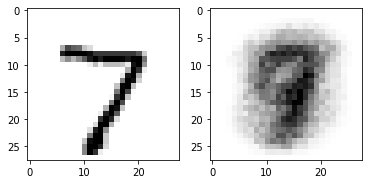

In [ ]:
plt.subplot(121)
plt.imshow(X_test[:1,:].reshape(28,28),cmap='binary')
plt.subplot(122)
plt.imshow(reconstruction[:1,:].reshape(28,28),cmap='binary')

# 3. Convolutional Autoencoder

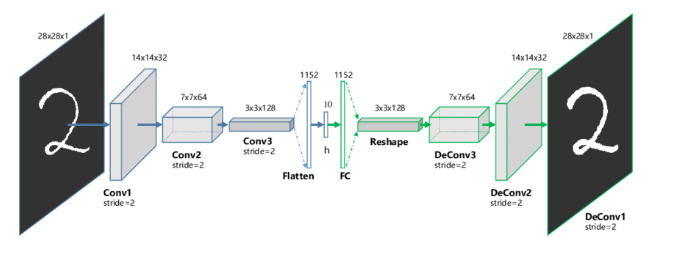

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
conv_encoder = tf.keras.models.Sequential([
    tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="relu",
                                 input_shape=[3, 3, 64]),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])
conv_ae = tf.keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer='rmsprop')
history = conv_ae.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1286
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0871
Epoch 3/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0813
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0785
Epoch 5/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0767


In [ ]:
coding=conv_encoder.predict(X_test)

In [ ]:
coding.shape

(10000, 3, 3, 64)

In [ ]:
reconstruction=conv_ae.predict(X_test)

In [ ]:
X_test.shape,reconstruction.shape

((10000, 28, 28), (10000, 28, 28))

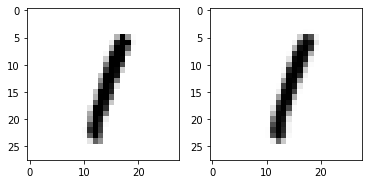

In [ ]:
plt.subplot(121)
plt.imshow(X_test[5:6,:,:].reshape(28,28),cmap='binary')
plt.subplot(122)
plt.imshow(reconstruction[5:6,:,:].reshape(28,28),cmap='binary')

# 4. Denoise Autoencoder

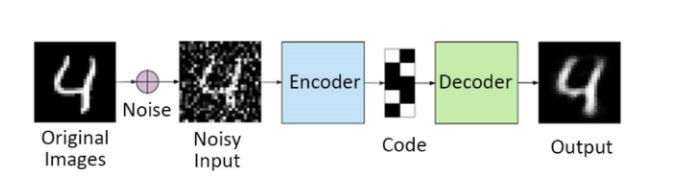

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
denoise_encoder = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[784]),                                         
    tf.keras.layers.GaussianNoise(0.2),# Or Dropout
    tf.keras.layers.Dense(120, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
])
denoise_decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[40]),
    tf.keras.layers.Dense(784, activation="sigmoid"),
])
denoise_autoencoder = tf.keras.models.Sequential([denoise_encoder, denoise_decoder])
denoise_autoencoder.compile(loss="binary_crossentropy",optimizer='sgd')
history = denoise_autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6871
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5482
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2880
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2755
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2727


In [ ]:
coding=denoise_encoder.predict(X_test)

In [ ]:
coding.shape

(10000, 40)

In [ ]:
reconstruction=denoise_autoencoder.predict(X_test)

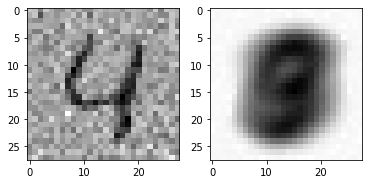

In [ ]:
plt.subplot(121)
noise= tf.keras.layers.GaussianNoise(0.2)
plt.imshow(noise(X_test[4:5,:].reshape(28,28),training=True),cmap='binary')
plt.subplot(122)
plt.imshow(reconstruction[4:5,:].reshape(28,28),cmap='binary')

# 5. Sparse Autoencoder

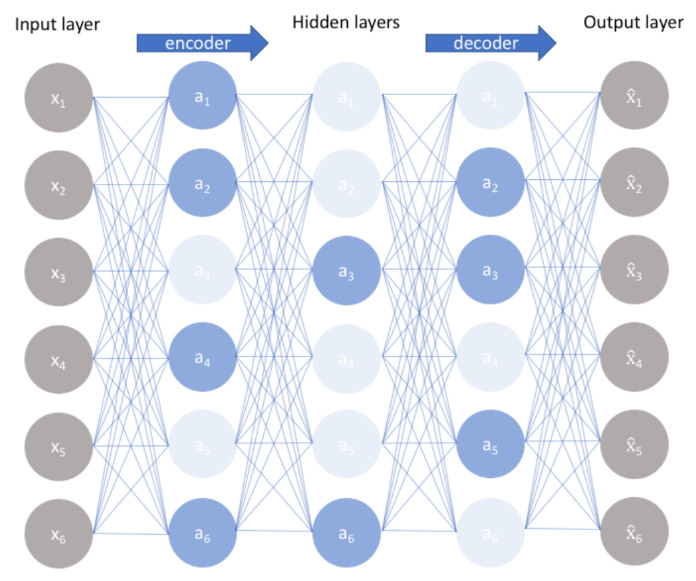

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu",input_shape=[784]),
    tf.keras.layers.Dense(300, activation="sigmoid"),
    tf.keras.layers.ActivityRegularization(l1=1e-3)
                                                  
])
sparse_decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[300]),
    tf.keras.layers.Dense(28 * 28, activation="sigmoid"),
])
sparse_autoencoder = tf.keras.models.Sequential([sparse_encoder, sparse_decoder])
sparse_autoencoder.compile(loss="binary_crossentropy", optimizer='sgd')
history = sparse_autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7640
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4919
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4198
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4024
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3847


In [ ]:
reconstruction=sparse_autoencoder.predict(X_test)

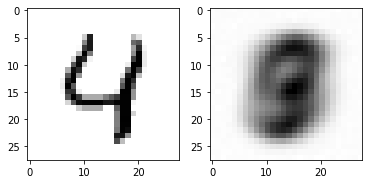

In [ ]:
plt.subplot(121)
plt.imshow(X_test[4:5,:].reshape(28,28),cmap='binary')
plt.subplot(122)
plt.imshow(reconstruction[4:5,:].reshape(28,28),cmap='binary')

# 6. Variational Autoencoder

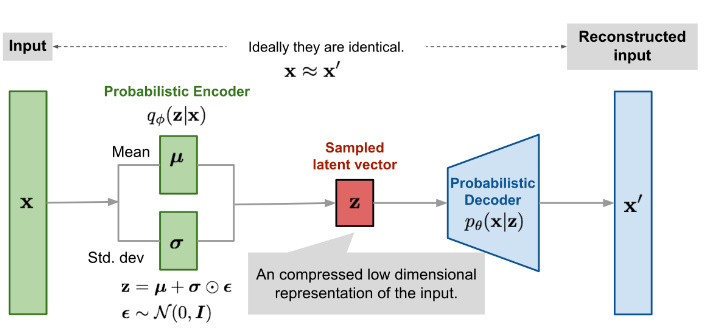

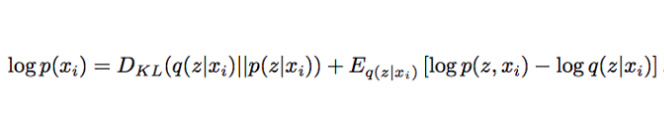

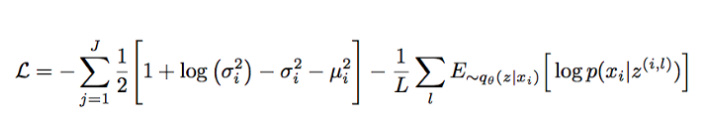

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Function API
#Encoder
encoder_input = tf.keras.layers.Input(shape=[784])
z = tf.keras.layers.Dense(120, activation="relu")(encoder_input)
z = tf.keras.layers.Dense(80, activation="relu")(z)
coding_mean = tf.keras.layers.Dense(10)(z)
coding_log_var = tf.keras.layers.Dense(10)(z)
def sampling(input):
   mean, log_var = input
   epsilon= tf.keras.backend.random_normal(tf.shape(log_var))
   return mean+tf.keras.backend.exp(log_var / 2)*epsilon
coding=tf.keras.layers.Lambda(sampling)([coding_mean,coding_log_var])
variational_encoder = tf.keras.models.Model(inputs=[encoder_input], outputs=[coding_mean, coding_log_var, coding])
#Decoder
decoder_input = tf.keras.layers.Input(shape=[10])
x = tf.keras.layers.Dense(80, activation="relu")(decoder_input)
x = tf.keras.layers.Dense(120, activation="relu")(x)
outputs =tf.keras.layers.Dense(784, activation="sigmoid")(x)
variational_decoder = tf.keras.models.Model(inputs=[decoder_input], outputs=[outputs])
#Autoencoder
_, _, coding = variational_encoder(encoder_input)
reconstructions = variational_decoder(coding)
variational_ae = tf.keras.models.Model(inputs=[encoder_input], outputs=[reconstructions])
#KL divergence
KL_loss = -0.5 * tf.keras.backend.sum(
    1 + coding_log_var - tf.keras.backend.exp(coding_log_var) - tf.keras.backend.square(coding_mean),
    axis=-1)
variational_ae.add_loss(tf.keras.backend.mean(KL_loss) / 784.)# divide 784 scale ratio as reconstruction loss
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")
history = variational_ae.fit(X_train, X_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 14s 24ms/step - loss: 0.2233
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1774
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 0.1661
Epoch 4/5
469/469 [==============================] - 6s 14ms/step - loss: 0.1606
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.1571


In [ ]:
reconstruction=variational_ae.predict(X_test)

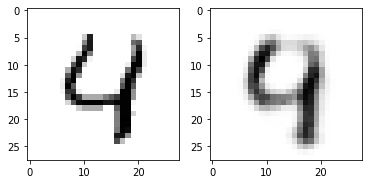

In [ ]:
plt.subplot(121)
plt.imshow(X_test[4:5,:].reshape(28,28),cmap='binary')
plt.subplot(122)
plt.imshow(reconstruction[4:5,:].reshape(28,28),cmap='binary')

In [ ]:
tf.random.set_seed(42)
codings = tf.random.normal(shape=[12, 10])
images = variational_decoder(codings).numpy()

In [ ]:
images.shape

(12, 784)

In [ ]:
codings.shape

TensorShape([12, 10])

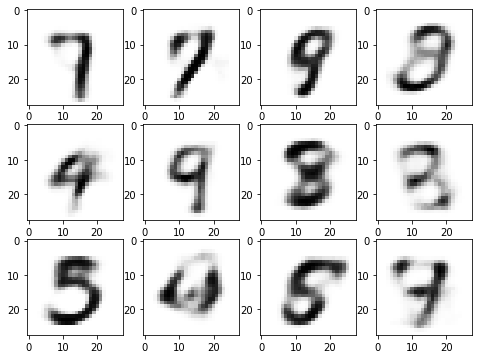

In [ ]:
n_cols = 4
n_rows = 3
plt.figure(figsize=(8,6))
for index, image in enumerate(images):
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(image.reshape(28,28), cmap="binary")
  

# 7. Gerative Adversarial Networks(GAN)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data()
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
generator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="selu", input_shape=[30]),
    tf.keras.layers.Dense(150, activation="selu"),
    tf.keras.layers.Dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(150, activation="selu"),
    tf.keras.layers.Dense(100, activation="selu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
gan = tf.keras.models.Sequential([generator, discriminator])

In [4]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [5]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [19]:
codings_size=30
def plot_image(images):        
    n_cols = 4
    n_rows = 3
    plt.figure(figsize=(8,6))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image.reshape(28,28), cmap="binary")
        

In [21]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))              # not shown in the book
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_image(generated_images)
        plt.show()

## Deep Convolutional GAN, Hashing Using a Binary Autoencoder